In [62]:
%matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import os
from config import key

csv = pd.read_csv('stations.csv')

Using matplotlib backend: Qt5Agg


In [71]:
version = 'v1'
package = ['history','stations']

city = 'Toronto'
country = 'Canada'

start_date_daily = '2007-01-01'
end_date_daily = '2019-01-01'

start_date_month = '2007-01'
end_date_month = '2018-12'

#station it is for Toronto City
station_id = '1052'

#url structure = https://api.meteostat.net/{VERSION}/{PACKAGE}/{METHOD}?{PARAMETERS}
#https://api.meteostat.net/v1/history/hourly?station=03772&start=2019-05-02&end=2019-05-11&time_zone=Europe/London&time_format=Y-m-d%20H:i&key=XXXXXXXX
#https://api.meteostat.net/v1/history/daily?station=10637&start=2017-01-01&end=2017-12-31&key=XXXXXXXX

historyparams_daily ={
    'start':start_date_daily,
    'end':end_date_daily,
    'key':key
    }

historyparams_monthly ={
    'start':start_date_month,
    'end':end_date_month,
    'key':key
    }

#method includes: daily, monthly
qry_daily_url = f'https://api.meteostat.net/v1/history/daily?station={station_id}'
qry_monthly_url = f'https://api.meteostat.net/v1/history/monthly?station={station_id}'

#get request for history
history_monthly = requests.get(qry_monthly_url,params=historyparams_monthly).json()
history_daily = requests.get(qry_daily_url,params=historyparams_daily).json()
#history_daily

history_daily

{'meta': {'source': 'National Oceanic and Atmospheric Administration, Deutscher Wetterdienst'},
 'data': []}

In [64]:
#THIS IS FOR MONTHLY
date_monthly = history_monthly['data'][0]['month']
temp_mean_monthly = history_monthly['data'][0]['temperature_mean']
temp_mean_min_monthly = history_monthly['data'][0]['temperature_mean_min']
temp_mean_max_monthly = history_monthly['data'][0]['temperature_mean_max']
temp_min_monthly = history_monthly['data'][0]['temperature_min']
temp_max_monthly = history_monthly['data'][0]['temperature_max']
precipitation_monthly = history_monthly['data'][0]['precipitation']
raindays_monthly = history_monthly['data'][0]['raindays']
pressure_monthly = history_monthly['data'][0]['pressure']
sunshine_monthly = history_monthly['data'][0]['sunshine']

# THIS IS FOR DAILY
date_daily = history_daily['data'][0]['date']
temp_daily = history_daily['data'][0]['temperature']
temp_min_daily = history_daily['data'][0]['temperature_min']
temp_max_daily = history_daily['data'][0]['temperature_max']
precip_daily = history_daily['data'][0]['precipitation']
snowfall_daily = history_daily['data'][0]['snowfall']
snowdepth_daily = history_daily['data'][0]['snowdepth']
wind_dir_daily = history_daily['data'][0]['winddirection']
wind_speed_daily = history_daily['data'][0]['windspeed']
peakgust_daily = history_daily['data'][0]['peakgust']
sunshine_daily = history_daily['data'][0]['sunshine']
pressure_daily = history_daily['data'][0]['pressure']

IndexError: list index out of range

In [ ]:
date_ls = []
temp_mean_ls = []
temp_mean_min_ls = []
temp_mean_max_ls = []
temp_min_ls = []
temp_max_ls = []
precipitation_ls = []
raindays_ls = []
pressure_ls = []
sunshine_ls = []

for x in range(len(history_monthly["data"])):
    date_ls.append(history_monthly['data'][x]['month'])
    temp_mean_ls.append(history_monthly['data'][x]['temperature_mean'])
    temp_mean_min_ls.append(history_monthly['data'][x]['temperature_mean_max'])
    temp_mean_max_ls.append(history_monthly['data'][x]['temperature_mean_min'])
    temp_min_ls.append(history_monthly['data'][x]['temperature_min'])
    temp_max_ls.append(history_monthly['data'][x]['temperature_max'])
    precipitation_ls.append(history_monthly['data'][x]['precipitation'])
    raindays_ls.append(history_monthly['data'][x]['raindays'])
    pressure_ls.append(history_monthly['data'][x]['pressure'])
    sunshine_ls.append(history_monthly['data'][x]['sunshine'])
    
print(f"{len(date_ls)},{len(temp_mean_ls)},{len(temp_mean_ls)},{len(temp_mean_min_ls)},{len(temp_mean_max_ls)},{len(temp_min_ls)},{len(temp_max_ls)},{len(precipitation_ls)},{len(raindays_ls)},{len(pressure_ls)},{len(sunshine_ls)}")

In [8]:
df = pd.DataFrame(date_ls).replace({"none":"0"}).rename(columns={"0":"date"})
df['tempMean'] = temp_mean_ls
df['tempMeanMin'] = temp_mean_min_ls
df['tempMeanMax'] =temp_mean_max_ls
df['tempMin'] =temp_min_ls
df['tempMax'] = temp_max_ls
df['precip'] = precipitation_ls
df['rainDays'] = raindays_ls
df['pressure'] = pressure_ls
df['sunshine'] = sunshine_ls
    
df.head()

,0,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine
0,2007-01,-1.7,1.4,-4.7,-15.8,11.9,40.0,10.0,1016.9,NaN
1,2007-02,-6.9,-3.4,-10.2,-18.5,5.9,26.0,6.0,1015.6,NaN
2,2007-03,1.5,5.1,-2.2,-20.9,16.9,44.0,7.0,1021.8,NaN
3,2007-04,6.9,10.3,3.6,-6.0,22.8,39.0,9.0,1013.2,NaN
4,2007-05,15.1,19.9,10.3,6.0,30.1,53.0,5.0,1020.0,NaN


In [9]:
df.describe()

,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine
count,144.000000,144.000000,144.000000,144.000000,144.000000,142.000000,142.000000,120.000000,63.000000
mean,9.757639,13.594444,5.904167,-1.526389,22.298611,67.126761,8.154930,1016.198333,185.317460
std,9.609906,10.091822,9.119417,11.230858,9.343552,34.860992,2.836679,2.516533,77.554315
min,-11.100000,-7.000000,-15.100000,-25.100000,-0.700000,11.000000,2.000000,1010.100000,67.000000
25%,0.900000,4.150000,-2.200000,-11.725000,14.475000,40.250000,6.000000,1014.500000,111.000000
50%,9.950000,13.900000,6.200000,0.050000,24.100000,61.500000,8.000000,1016.050000,186.000000
75%,19.250000,23.425000,14.850000,9.000000,30.600000,85.250000,10.000000,1018.050000,253.500000
max,24.900000,29.800000,19.900000,17.200000,38.200000,184.000000,17.000000,1022.200000,324.000000


In [10]:
# GOOD CODE ENDS HERE

In [11]:
#rename first column to date
df = df.rename(columns={0:'date'})

In [12]:
df.head()

,date,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine
0,2007-01,-1.7,1.4,-4.7,-15.8,11.9,40.0,10.0,1016.9,NaN
1,2007-02,-6.9,-3.4,-10.2,-18.5,5.9,26.0,6.0,1015.6,NaN
2,2007-03,1.5,5.1,-2.2,-20.9,16.9,44.0,7.0,1021.8,NaN
3,2007-04,6.9,10.3,3.6,-6.0,22.8,39.0,9.0,1013.2,NaN
4,2007-05,15.1,19.9,10.3,6.0,30.1,53.0,5.0,1020.0,NaN


In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
x_axis = df['date']

In [15]:
type(df['date'])

pandas.core.series.Series

In [16]:
type(x_axis)

pandas.core.series.Series

In [17]:
y_axis_avgTemp = df['tempMean']
y_axis_avgTempMin = df['tempMeanMin']
y_axis_avgTempMax = df['tempMeanMax']
y_axis_tempMin = df['tempMin']
y_axis_tempMax = df['tempMax']

#find the difference between tempMean, tempMin, tempMax



In [20]:
df.head()

,date,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine
0,2007-01-01,-1.7,1.4,-4.7,-15.8,11.9,40.0,10.0,1016.9,NaN
1,2007-02-01,-6.9,-3.4,-10.2,-18.5,5.9,26.0,6.0,1015.6,NaN
2,2007-03-01,1.5,5.1,-2.2,-20.9,16.9,44.0,7.0,1021.8,NaN
3,2007-04-01,6.9,10.3,3.6,-6.0,22.8,39.0,9.0,1013.2,NaN
4,2007-05-01,15.1,19.9,10.3,6.0,30.1,53.0,5.0,1020.0,NaN


In [43]:
df['diffMin'] = df['tempMean'] - df['tempMin' ]

In [45]:
df['diffMax'] = df['tempMean'] - df['tempMax']

In [46]:
df

,date,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine,diffMinMax,diffMin,diffMax
0,2007-01-01,-1.7,1.4,-4.7,-15.8,11.9,40.0,10.0,1016.9,NaN,27.7,14.1,-13.6
1,2007-02-01,-6.9,-3.4,-10.2,-18.5,5.9,26.0,6.0,1015.6,NaN,24.4,11.6,-12.8
2,2007-03-01,1.5,5.1,-2.2,-20.9,16.9,44.0,7.0,1021.8,NaN,37.8,22.4,-15.4
3,2007-04-01,6.9,10.3,3.6,-6.0,22.8,39.0,9.0,1013.2,NaN,28.8,12.9,-15.9
4,2007-05-01,15.1,19.9,10.3,6.0,30.1,53.0,5.0,1020.0,NaN,24.1,9.1,-15.0
5,2007-06-01,21.0,26.1,15.8,7.4,33.2,30.0,6.0,1013.7,NaN,25.8,13.6,-12.2
6,2007-07-01,21.4,26.1,16.8,11.7,34.7,80.0,6.0,1013.4,NaN,23.0,9.7,-13.3
7,2007-08-01,22.7,27.2,18.3,11.8,33.9,30.0,5.0,1014.3,NaN,22.1,10.9,-11.2
8,2007-09-01,18.4,23.2,14.1,6.6,31.0,32.0,5.0,1018.4,NaN,24.4,11.8,-12.6
9,2007-10-01,14.6,18.2,10.8,1.5,30.8,51.0,5.0,1016.2,NaN,29.3,13.1,-16.2


In [33]:
df.head()

,date,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine,diffMinMax
0,2007-01-01,-1.7,1.4,-4.7,-15.8,11.9,40.0,10.0,1016.9,NaN,27.7
1,2007-02-01,-6.9,-3.4,-10.2,-18.5,5.9,26.0,6.0,1015.6,NaN,24.4
2,2007-03-01,1.5,5.1,-2.2,-20.9,16.9,44.0,7.0,1021.8,NaN,37.8
3,2007-04-01,6.9,10.3,3.6,-6.0,22.8,39.0,9.0,1013.2,NaN,28.8
4,2007-05-01,15.1,19.9,10.3,6.0,30.1,53.0,5.0,1020.0,NaN,24.1


In [47]:
y_axis_diff = df['diffMinMax']
y_axis_diffMin = df['diffMin']
y_axis_diffMax = df['diffMax']

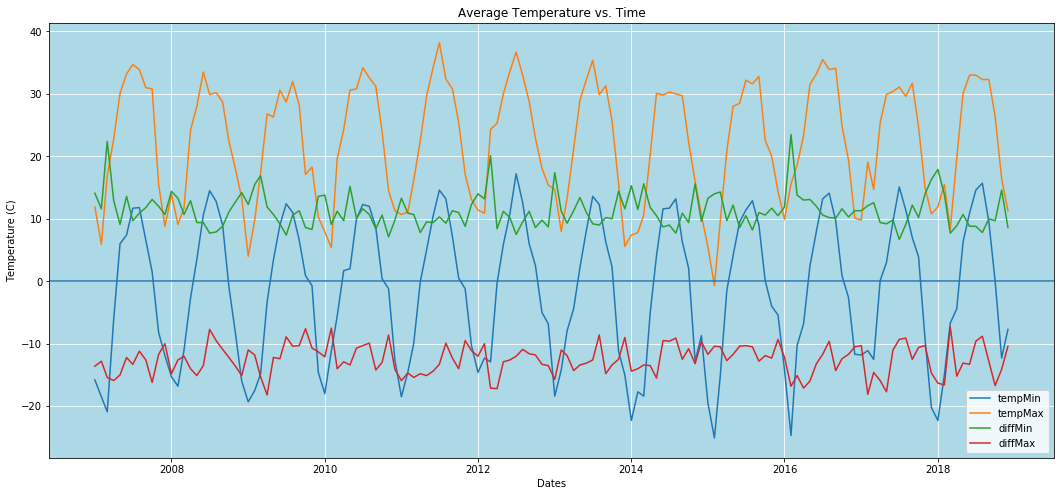

In [61]:
#x_ticks =['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

fig, ax = plt.subplots()


#ax.plot(x_axis,y_axis_avgTemp,c='red',ls='--',marker='^')
#ax.plot(x_axis,y_axis_avgTempMin,c='green')
#ax.plot(x_axis,y_axis_avgTempMax,c='purple')
ax.plot(x_axis,y_axis_tempMin)
ax.plot(x_axis,y_axis_tempMax)
ax.plot(x_axis,y_axis_diffMin)
ax.plot(x_axis,y_axis_diffMax)
#ax.plot(x_axis,y_axis_diff)
#ax.plot(x_axis,)
#ax.scatter(x_axis,y_axis,c='red',s=200)
#ax.set_xticks()
#ax.set_xlim('2005','2020')
fig.set_figheight(8)
fig.set_figwidth(18)
ax.set_title('Average Temperature vs. Time')
ax.set_xlabel('Dates')
ax.set_ylabel('Temperature (C)')
ax.set_facecolor('lightblue')
ax.grid(color='white')
ax.legend()
plt.hlines(y_axis_avgTemp)
plt.axhline(0,0,1)


plt.savefig(os.path.join(f'Test.png'))
#plt.show()

In [ ]:
#ROUGH CODE FOLLOWS

In [ ]:
cityparams ={
    'q':city,
    'key':key
    }

qry_url_city = 'https://api.meteostat.net/v1/stations/search?'

countryparams={
    'country':country,
    'key':key   
    }
#response_country = requests.get(qry_url_country).json()
qry_url_country = 'https://api.meteostat.net/v1/stations/search?q=CA'

#response_country = requests.get(qry_url_country).json()
test_url = f'https://api.meteostat.net/v1/stations/search?q={city}&key={key}'

In [ ]:


#for index, row in staging_df.iterrows():
#    stationid = row['station_id']
#    stationidparams={
#    'start':start_date,
#    'end':end_date,
#    'key':key
#    }
#    print(f'Processing Record {index} set of | {stationid}')
#    response = requests.get(qry_history_url,params=stationidparams).json()
    
    #try:
    #    staging_df['meta_source'] = history['meta']['source']
    #except:KeyError
    #    print('missing values, i am going to skip it')
    #    print('====================================')


In [ ]:
csv.head()

In [ ]:
# #station id
# station_df = csv['stationid']

# #reset index for dataframe
# station_df = station_df.reset_index()

# station_df.head()

In [ ]:
#stationid = row['stationid']

#station

stationidparams={
    'start':start_date,
    'end':end_date,
    'key':key
    }
    #print(f'Processing Record {index} set of | {stationid}')
response = requests.get(qry_history_url,params=stationidparams).json()

In [ ]:
stationid = station_df['stationid']

In [ ]:
station_df['stationid']

In [ ]:
#city_df.loc[index,'Cloudiness']=response['clouds']['all']

for index, row in staging_df.iterrows():
    try:
        station_id = row['stationid']
        print(station_id)
    except:
        print('Type error, i am going to skip it')
        print('==================================')
    #qry_url = f'https://api.meteostat.net/v1/history/daily?station={station_id}'
    #stationidparams={
    #'start':start_date,
    #'end':end_date,
    #'key':key
    #}
    #print(f'Processing Record {index} set of | {station_id}')
    #response = requests.get(qry_url,params=stationidparams).json()
    #staging_df.loc[index,'meta_source'] = response['meta']['source']
    #except:KeyError
    #try:
        
        #print('missing values, i am going to skip it')
        #print('====================================')

In [ ]:
station_id